In [1]:
"""
규격: 3024 × 4032
알파 채널: 아니오
색상공간: RGB
F 값: f/1.8
"""
# object detection, sementic segmentation

'\n규격: 3024\u200a×\u200a4032\n알파 채널: 아니오\n색상공간: RGB\nF 값: f/1.8\n'

In [2]:
import cv2
import numpy as np
import albumentations as A
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
img_dir = glob("../Data/*")

In [4]:
print(img_dir[1])

../Data/test_preprocess.jpg


In [5]:
origin_cv = cv2.imread(img_dir[1])

In [6]:
user_input = cv2.imread(img_dir[1])
user_input = cv2.cvtColor(user_input, cv2.COLOR_BGR2RGB)

In [7]:
transform_model = A.Compose([
#     A.ToFloat(max_value=255, always_apply=True),
    A.ToGray(always_apply=True)
])

In [8]:
transformed_user_input = transform_model(image=user_input)["image"]

In [10]:
transformed_user_input

array([[[102, 102, 102],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [153, 153, 153],
        [149, 149, 149],
        [150, 150, 150]],

       [[108, 108, 108],
        [107, 107, 107],
        [105, 105, 105],
        ...,
        [150, 150, 150],
        [149, 149, 149],
        [149, 149, 149]],

       [[108, 108, 108],
        [105, 105, 105],
        [101, 101, 101],
        ...,
        [147, 147, 147],
        [146, 146, 146],
        [144, 144, 144]],

       ...,

       [[ 45,  45,  45],
        [ 46,  46,  46],
        [ 44,  44,  44],
        ...,
        [148, 148, 148],
        [149, 149, 149],
        [150, 150, 150]],

       [[ 45,  45,  45],
        [ 43,  43,  43],
        [ 38,  38,  38],
        ...,
        [149, 149, 149],
        [149, 149, 149],
        [148, 148, 148]],

       [[ 47,  47,  47],
        [ 43,  43,  43],
        [ 39,  39,  39],
        ...,
        [150, 150, 150],
        [148, 148, 148],
        [147, 147, 147]]

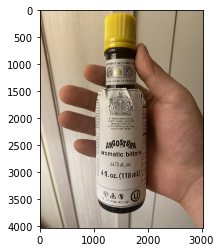

In [11]:
plt.imshow(user_input)

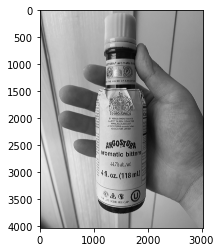

In [12]:
plt.imshow(transformed_user_input)

In [13]:
gray = 255 - transformed_user_input

In [14]:
gray

array([[[153, 153, 153],
        [152, 152, 152],
        [152, 152, 152],
        ...,
        [102, 102, 102],
        [106, 106, 106],
        [105, 105, 105]],

       [[147, 147, 147],
        [148, 148, 148],
        [150, 150, 150],
        ...,
        [105, 105, 105],
        [106, 106, 106],
        [106, 106, 106]],

       [[147, 147, 147],
        [150, 150, 150],
        [154, 154, 154],
        ...,
        [108, 108, 108],
        [109, 109, 109],
        [111, 111, 111]],

       ...,

       [[210, 210, 210],
        [209, 209, 209],
        [211, 211, 211],
        ...,
        [107, 107, 107],
        [106, 106, 106],
        [105, 105, 105]],

       [[210, 210, 210],
        [212, 212, 212],
        [217, 217, 217],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [107, 107, 107]],

       [[208, 208, 208],
        [212, 212, 212],
        [216, 216, 216],
        ...,
        [105, 105, 105],
        [107, 107, 107],
        [108, 108, 108]]

In [15]:
ret, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

In [16]:
# 구조요소 생성함수: 모폴로지 연산의 커널 쉐입
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

In [17]:
morp = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

In [18]:
bitwised_image = cv2.bitwise_not(morp)

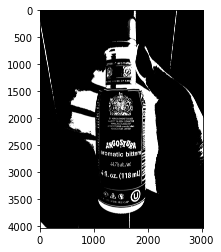

In [21]:
plt.imshow(morp)

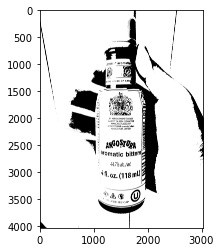

In [20]:
plt.imshow(bitwised_image)

In [23]:
bitwised_image = cv2.cvtColor(bitwised_image, cv2.COLOR_BGR2GRAY)

In [24]:
contours, hierarchy = cv2.findContours(bitwised_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) #cv2.CHAIN_APPROX_SIMPLE

In [31]:
dst = transformed_user_input.copy()

In [32]:
cv2.drawContours(dst, contours, -1, (0,0,255), 3)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[ 45,  45,  45],
        [ 46,  46,  46],
        [ 44,  44,  44],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[ 45,  45,  45],
        [ 43,  43,  43],
        [ 38,  38,  38],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[ 47,  47,  47],
        [ 43,  43,  43],
        [ 39,  39,  39],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [33]:
len(contours)

22

In [34]:
for i in range(len(contours)):
    cv2.putText(dst, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 1.3, (255,0,0), 1)
    print(i, hierarchy[0][i])

0 [ 1 -1 -1 -1]
1 [ 2  0 -1 -1]
2 [ 3  1 -1 -1]
3 [ 4  2 -1 -1]
4 [ 5  3 -1 -1]
5 [ 6  4 -1 -1]
6 [ 7  5 -1 -1]
7 [ 8  6 -1 -1]
8 [ 9  7 -1 -1]
9 [10  8 -1 -1]
10 [11  9 -1 -1]
11 [12 10 -1 -1]
12 [13 11 -1 -1]
13 [14 12 -1 -1]
14 [15 13 -1 -1]
15 [16 14 -1 -1]
16 [17 15 -1 -1]
17 [18 16 -1 -1]
18 [19 17 -1 -1]
19 [20 18 -1 -1]
20 [21 19 -1 -1]
21 [-1 20 -1 -1]


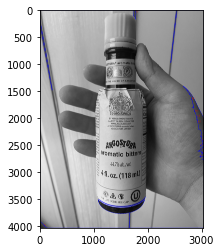

In [35]:
plt.imshow(dst, cmap='gray')